First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

/tmp/ipykernel_20469/4248416045.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = class_counts.index, y = class_counts.values, palette = "viridis")


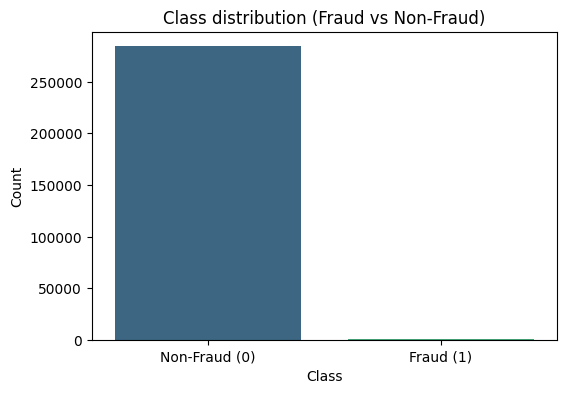


 Descriptive statistics of the dataset:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
s

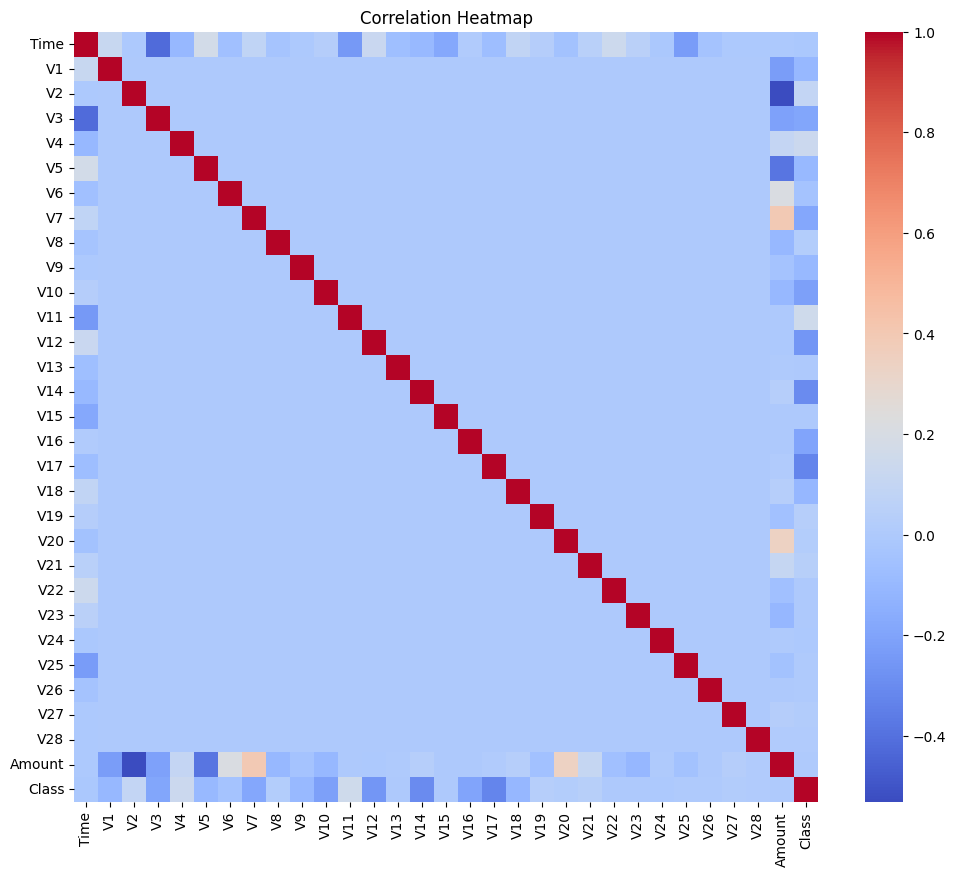

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "creditcard.csv"
df = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(df.head())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nClass distribution:")
print(df["Class"].value_counts())
class_counts = df["Class"].value_counts()
plt.figure(figsize = (6, 4))
sns.barplot(x = class_counts.index, y = class_counts.values, palette = "viridis")
plt.title("Class distribution (Fraud vs Non-Fraud)")
plt.xticks([0, 1], ["Non-Fraud (0)", "Fraud (1)"])
plt.ylabel("Count")
plt.show()

print("\n Descriptive statistics of the dataset:")
print(df.describe())

plt.figure(figsize = (12, 10))
corr = df.corr()
sns.heatmap(corr, cmap = "coolwarm", annot = False, fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()


Class distribution (0: Non-Fraud, 1: Fraud):
Class
0    284315
1       492
Name: count, dtype: int64


/tmp/ipykernel_20469/412455643.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = class_counts.index, y = class_counts.values, palette = "viridis")


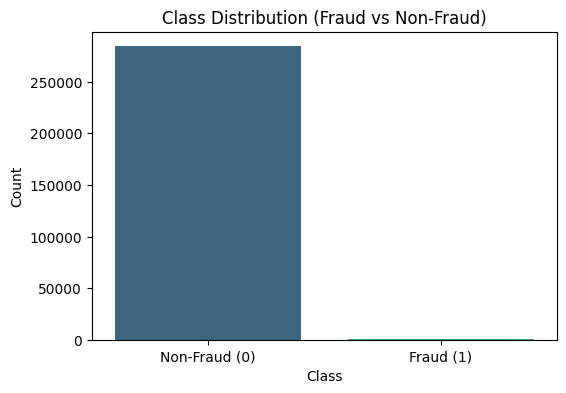

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df["Class"].value_counts()

print("\nClass distribution (0: Non-Fraud, 1: Fraud):")
print(class_counts)

plt.figure(figsize = (6, 4))
sns.barplot(x = class_counts.index, y = class_counts.values, palette = "viridis")
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.xticks([0, 1], ["Non-Fraud (0)", "Fraud (1)"])
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

X = df.drop(columns=['Class'])
y = df['Class']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    precision_scores = []
    recall_scores = []
    f1_scores = []
    auprc_scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        y_prob = model.predict_proba(X_test)[:, 1]
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
        auprc = auc(recall_curve, precision_curve)
        
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        auprc_scores.append(auprc)
    
    print(f"\nModel: {model_name}")
    print(f"Average Precision: {np.mean(precision_scores):.4f}")
    print(f"Average Recall: {np.mean(recall_scores):.4f}")
    print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
    print(f"Average AUPRC: {np.mean(auprc_scores):.4f}")


Evaluating Logistic Regression...

Model: Logistic Regression
Average Precision: 0.8483
Average Recall: 0.6139
Average F1-Score: 0.7107
Average AUPRC: 0.6482


In [6]:
import pandas as pd
import numpy as np

df["Hour"] = df["Time"] / 3600
df["Time_Since_Last_Transaction"] = df["Time"].diff().fillna(0)

df["Log_Amount"] = np.log1p(df["Amount"])

df["Amount_Category"] = pd.cut(df["Amount"], bins = [0, 1, 10, 100, 1000, np.inf], labels = ["Very Low", "Low", "Medium", "High", "Very High"])

df["V1_V2_Interaction"] = df["V1"] * df["V2"]

df["V1_V3_Interaction"] = df["V1"] * df["V3"]
df["V2_V4_Interaction"] = df["V2"] * df["V4"]

print("\nFirst few rows with new features:")
print(df[["Time", "Hour", "Time_Since_Last_Transaction", "Amount", "Log_Amount", "Amount_Category", "V1_V2_Interaction"]].head())


First few rows with new features:
   Time      Hour  Time_Since_Last_Transaction  Amount  Log_Amount  \
0   0.0  0.000000                          0.0  149.62    5.014760   
1   0.0  0.000000                          0.0    2.69    1.305626   
2   1.0  0.000278                          1.0  378.66    5.939276   
3   1.0  0.000278                          0.0  123.50    4.824306   
4   2.0  0.000556                          1.0   69.99    4.262539   

  Amount_Category  V1_V2_Interaction  
0            High           0.098968  
1             Low           0.317214  
2            High           1.820416  
3            High           0.178979  
4          Medium          -1.016624  


In [12]:
from sklearn.metrics import precision_recall_curve

y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal Threshold for Fraud Detection: {optimal_threshold}")

Optimal Threshold for Fraud Detection: 0.17896520361810758


In [14]:
from scipy.stats import zscore

df["Amount_Z_Score"] = zscore(df["Amount"])

new_transaction_amount = 500

mean_amount = df["Amount"].mean()
std_amount = df["Amount"].std()
z_score_new = (new_transaction_amount - mean_amount) / std_amount

if z_score_new > 1:
    print("Transaction flagged as unusual based on amount")

Transaction flagged as unusual based on amount
